In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

# Any results you write to the current directory are saved as output.
data = pd.read_csv('diabetes.csv')
#print(help(data.head))
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.describe()
#data.describe?

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


AttributeError: module 'matplotlib.pyplot' has no attribute 'list'

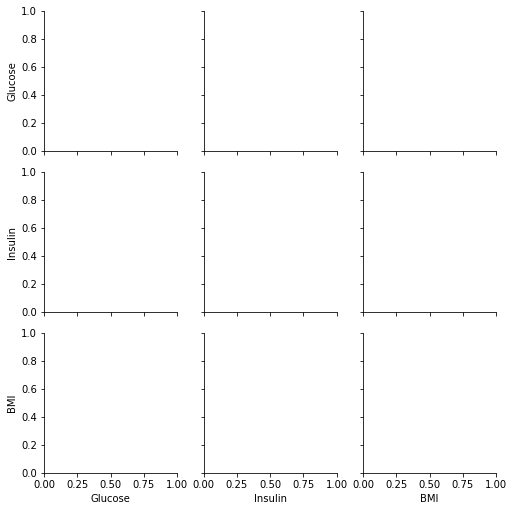

In [4]:
g = sns.PairGrid(data, vars=['Glucose', 'Insulin', 'BMI'], hue="Outcome", size=2.4)
g.map_diag(plt.list)
g.map_upper(plt.scater)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'list'

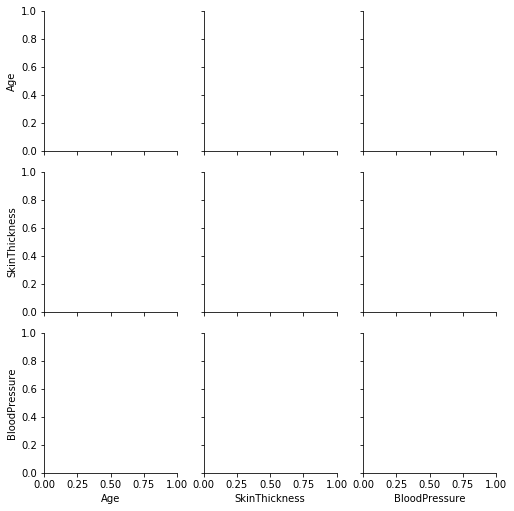

In [8]:
g = sns.PairGrid(data, vars=['Age', 'SkinThickness', 'BloodPressure'], hue="Outcome", size=2.4)
g.map_diag(plt.list)
g.map_upper(plt.scater)
g.map_lower(s.deplot, cmap="Blues_d")
g.add_legend()
plt.show()

In [9]:
columns = ['Glucose', 'Age', 'BloodPressure', 'Insulin','BMI','SkinThickness' ,'Pregnancies',  'DiabetesPedigreeFunction']
n_cols = 2
n_rows = 4
idx = 0

for i in range(n_rows):
    fg,ax = plt.plots(nrows=1,ncols=n_cols,sharey=True,figsize=(8, 2.4))
    for j in range(n_cols):
        sns.plot(x = data.Outcome, y=data[columns[idx]], ax=ax[j]) 
        idx += 1
        if idx >= 8:
            break

AttributeError: module 'matplotlib.pyplot' has no attribute 'plots'

In [10]:
# remove the Outlier of skin thickness

max_skinthickness = data.SkinThikness.max()
data = data[data.SkinThickness!=max_skinthikness

SyntaxError: unexpected EOF while parsing (<ipython-input-10-333e5e720aee>, line 4)

In [11]:
# create a helper function
def replace_zero(df, field, target):
    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

    # run the function
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
    replace_zero(data, col, 'Outcome')

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [13]:
# split data

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)
print(y_train.shape)
print(y_test.shape)

(460, 8)
(308, 8)
460
308
(460,)
(308,)


In [14]:
# load algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score

# helper functions
def train_clf(clf, X_train, y_train):
    return clf.fit(X_train, y_train)
    
def pred_clf(clf, features, target):
    
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred, pos_label = 1)

def train_predict(clf, X_train, y_train, X_test, y_test):
    train_clf(clf, X_train, y_train)
    
    print("F1 score for training set is: {0:.4f}".format(pred_clf(clf, X_train, y_train)))
    print("F1 score for testing set is: {0:.4f}\n".format(pred_clf(clf, X_test, y_test)))

In [15]:
# load algorithms
nb = GaussianNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
abc = AdaBoostClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)

algorithms = [nb,knn, dtc, rfc, abc, gbc]

for clf in algorithms:
    """
    print("\n{}: \n".format(clf.__class__.__name__))
    
    # create training data from first 100, then 200, then 300
    #for n in [179, 358, 537]:
        #train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)
    """  
    print("{0}:".format(clf))
    train_predict(clf, X_train, y_train, X_test, y_test)

GaussianNB(priors=None, var_smoothing=1e-09):
F1 score for training set is: 0.6954
F1 score for testing set is: 0.6230

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'):
F1 score for training set is: 0.8000
F1 score for testing set is: 0.7857

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'):
F1 score for training set is: 1.0000
F1 score for testing set is: 0.8000

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
      

In [16]:
X_test.shape

(308, 8)

In [17]:
# split training set into training and testing set
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size = 0.3, random_state=100)
for n in range(3,10):    
    knn = KNeighborsClassifiers(n_neighbors=n)
    print("Number of neighbors is: {}".format(n))
    train_predict(knn, X_train_cv, y_train_cv, X_test_cv, y_test_cv)

NameError: name 'KNeighborsClassifiers' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifiers(n_neighbors=8)
clf_ = knn.fit(X_train, y_train)
y_pred = clf_.predict(X_test)
print('Accuracy is {}'.format(accuracy_score(y_test,y_pred )))

In [ ]:
knn

In [18]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
params = {'n_estimators':1200, 'max_depth':9, 'subsample':0.5, 'learning_rate':0.01, 'min_samples_leaf':1, 'random_state':0}
gbc = GradientBoostingClassifier(**params)

n_estimators = 10
clf = gbc

# split training set into training and testing set
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size = 0.3, random_state=100)

X_train_cv = X_train_cv.reset_index(drop=True, inplace=False)
y_train_cv = y_train_cv.reset_index(drop=True, inplace=False)


clf.fit(X_train_cv,y_train_cv)
#score = f1_score(y_train, clf.predict(X_train), pos_label = 1)
acc = clf.score(X_test_cv, y_test_cv)
    
n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1

""" The following part code was stole from sklearn """
def heldout_score(clf, X_test_cv, y_test_cv):
    """compute deviance scores on ``X_test`` and ``y_test``. """
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_decision_function(X_test_cv)):
        score[i] = clf.loss_(y_test_cv, y_pred)
    return score
# Estimate best n_estimator using cross-validation
cv_score = cv_estimate(3)

# Compute best n_estimator for test data
test_score = heldout_score(clf, X_test_cv, y_test_cv)

# negative cumulative sum of oob improvements
cumsum = -np.cumsum(clf.oob_improvement_)

# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]
    
# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# plot curves and vertical lines for best iterations
plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)
plt.show()


NameError: name 'cv_estimate' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

params = {'max_depth':9, 'subsample':0.5, 'learning_rate':0.01, 'min_samples_leaf':1, 'random_state':0}
gbc = GradientBoostingClassifier(n_estimators=290, **params)
clf_ = gbc.fit(X_train, y_train)
y_pred = clf_.predict(X_test)
print('Accuracy is {}'.format(accuracy_score(y_test,y_pred )))
train_predict(gbc, X_train, y_train, X_test, y_test)